In [2]:
import numpy as np
from qiskit import *
import matplotlib.pyplot as plt
import matplotlib as mpl
from qiskit.visualization import plot_histogram, plot_bloch_multivector

1- Crie um circuito com 3 qubits e 2 bits clássicos.

In [3]:
qr = QuantumRegister(3, name="q")    
cr = ClassicalRegister(2, name="creg") 
qc = QuantumCircuit(qr,cr)

2- Inicie o qubit *qo* com um estado aleatório. Crie um estado qualquer.

In [4]:
initial_state = [(-1/4)**.5 ,(3/4)**.5]  
qc.initialize(initial_state, 0) 

3- Plote a esfera de Bloch com os estados dos qubits.

C:\Users\Teka\AppData\Roaming\Python\Python39\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


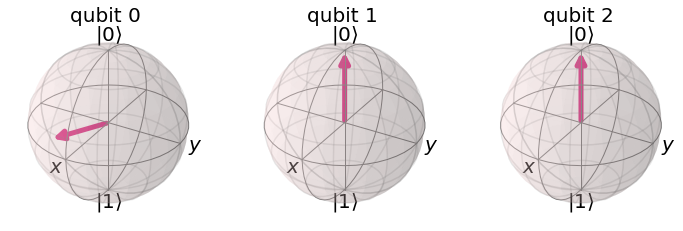

In [5]:
sv_sim = Aer.get_backend("statevector_simulator")
qobj = assemble(qc)
statevector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(statevector)

4- Implemente o circuito de teletransporte do estado do qubit *0* para o qubit *2*.

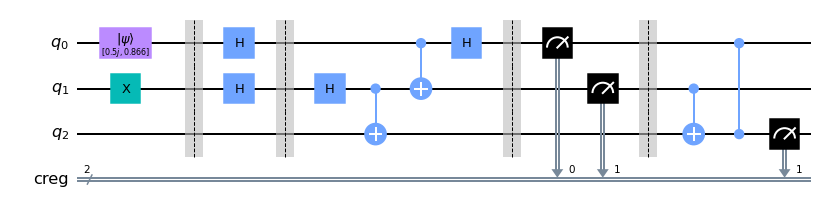

In [7]:
qc.h(1)
qc.cx(1,2)
qc.cx(0,1)
qc.h(0)
qc.barrier()
qc.measure(range(2),range(2))
qc.barrier()
qc.cx(1,2)
qc.cz(0,2)
qc.measure(2,1)
qc.draw(output='mpl')

5- Plote a esfera de Bloch para os estados everifique se o estado do qubit *0* foi corretamente transferido ao qubit *2*. Se sim, você mostrou que uma quantidade infinita de informação foi movida entre dois pontos distantes. Para isso, apenas 2 bits clássivos foram enviados. 

C:\Users\Teka\AppData\Roaming\Python\Python39\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


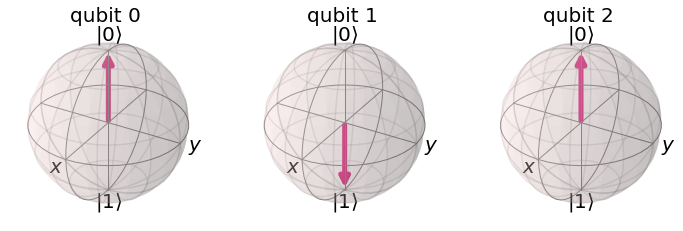

In [8]:
sv_sim = Aer.get_backend("statevector_simulator")
qobj = assemble(qc)
statevector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(statevector)

6- Faça medições do qubit *2* e verifique que as probabilidades de ocorrencia de *0* ou *1* inicialmente válidas para o qubit *0* agora são as probabilidades de ocorrência para o qubit *2*.